## Projeto Corals

Este notebook tem como objetivo carregar os dados do dataset CoralBleaching, preparar os dados, treinar um modelo de previsibilidade e salvar o modelo treinado para ser utilizado em uma aplicação.

### 1. Importação das Bibliotecas

Primeiramente, vamos importar todas as bibliotecas necessárias para o desenvolvimento do projeto.

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### 2. Carregamento e vizualização inicial

Vamos carregar o dataset e fazer uma breve análise exploratória dos dados.

In [2]:
# Carrega os dados
file_path = 'CoralBleaching.xlsx'
data = pd.read_excel(file_path)

In [3]:
# Visualiza as primeiras linhas do dataset
data.head()

,ID,REGION,SUBREGION,COUNTRY,LOCATION,LAT,LON,MONTH,YEAR,DEPTH,...,RECOVERY_CODE,RECOVERY,SURVEY_TYPE,SURVEY_AREA,WATER_TEMPERATURE,OTHER_FACTORS,REMARKS,SOURCE,REFERENCE_CODE,COUNTRY_CODE
0,7067,NaN,NaN,France,"Hermitage, Reunion",-21.22,55.22,4.0,2008,6.0,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert. Site ...",NaN,FRA
1,7068,NaN,NaN,France,"Saint Gilles, Reunion",-21.05,55.23,7.0,2008,6.5,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert. Site ...",NaN,FRA
2,7069,NaN,NaN,France,"Saint-Leu, Reunion",-21.16,55.28,2.0,2008,6.0,...,NaN,NaN,Reef Check Protocol,NaN,NaN,NaN,0% of recorded Recently killed coral on substr...,"Reef Check, Submitted by Harold Cambert . Site...",NaN,FRA
3,4024,NaN,NaN,France,SE France,43.00,5.00,8.0,1999,NaN,...,NaN,NaN,Diving,100 km,22-23.9 °C,NaN,Bleaching of Cladocora caespitosa and Oculina ...,Martin Pêcheux (martin-pecheux@wanadoo.fr) per...,NaN,FRA
4,7049,NaN,NaN,Macau,"Koh Tao, Surat Thani",10.12,99.81,7.0,2009,4.0,...,NaN,NaN,Reef Check Protocol,NaN,"Air temp 28 Deg C, Water temp 29 Deg C",NaN,0% of recorded recently killed coral on substr...,Reef check submitted by Suchana Apple Chavanic...,NaN,MAC


### 3. Análise descritiva da base de dados

Nesta seção, vamos realizar uma análise descritiva completa da base de dados. A análise incluirá a visualização inicial dos dados, estatísticas descritivas, verificação de valores nulos, distribuições das variáveis, correlações entre as variáveis e visualizações gráficas.

In [4]:
# Informações iniciais do dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6190 entries, 0 to 6189
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6190 non-null   int64  
 1   REGION               6163 non-null   object 
 2   SUBREGION            6163 non-null   object 
 3   COUNTRY              6190 non-null   object 
 4   LOCATION             6067 non-null   object 
 5   LAT                  6190 non-null   float64
 6   LON                  6190 non-null   float64
 7   MONTH                4881 non-null   float64
 8   YEAR                 6190 non-null   int64  
 9   DEPTH                2534 non-null   float64
 10  DEPTH_MEAN           2959 non-null   float64
 11  SEVERITY_CODE        6190 non-null   int64  
 12  BLEACHING_SEVERITY   6190 non-null   object 
 13  CORAL_FAMILY         298 non-null    object 
 14  CORAL_SPECIES        820 non-null    object 
 15  PERCENTAGE_AFFECTED  1314 non-null   f

In [5]:
# Verificação de valores nulos
data.isnull().sum()

ID                        0
REGION                   27
SUBREGION                27
COUNTRY                   0
LOCATION                123
LAT                       0
LON                       0
MONTH                  1309
YEAR                      0
DEPTH                  3656
DEPTH_MEAN             3231
SEVERITY_CODE             0
BLEACHING_SEVERITY        0
CORAL_FAMILY           5892
CORAL_SPECIES          5370
PERCENTAGE_AFFECTED    4876
BLEACHING_DURATION     5927
MORTALITY_CODE         5681
MORTALITY              5714
RECOVERY_CODE          6099
RECOVERY               6069
SURVEY_TYPE            3939
SURVEY_AREA            5213
WATER_TEMPERATURE      5124
OTHER_FACTORS          6102
REMARKS                3103
SOURCE                    0
REFERENCE_CODE         4721
COUNTRY_CODE              0
dtype: int64

In [6]:
# Análise de valores únicos e duplicados
print(data.nunique())
data.drop_duplicates(inplace=True)

ID                     6190
REGION                    6
SUBREGION                17
COUNTRY                 112
LOCATION               3330
LAT                    3835
LON                    3864
MONTH                    12
YEAR                     39
DEPTH                   331
DEPTH_MEAN              350
SEVERITY_CODE             5
BLEACHING_SEVERITY        5
CORAL_FAMILY            120
CORAL_SPECIES           589
PERCENTAGE_AFFECTED     479
BLEACHING_DURATION      108
MORTALITY_CODE            6
MORTALITY               357
RECOVERY_CODE             4
RECOVERY                 80
SURVEY_TYPE             345
SURVEY_AREA              61
WATER_TEMPERATURE       524
OTHER_FACTORS            66
REMARKS                1761
SOURCE                  860
REFERENCE_CODE          126
COUNTRY_CODE            112
dtype: int64


#### Análise das variáveis numéricas

In [7]:
# Estatísticas descritivas das variáveis númericas
data.describe()

,ID,LAT,LON,MONTH,YEAR,DEPTH,DEPTH_MEAN,SEVERITY_CODE,PERCENTAGE_AFFECTED,MORTALITY_CODE,RECOVERY_CODE,REFERENCE_CODE
count,6190.000000,6190.000000,6190.000000,4881.000000,6190.000000,2534.000000,2959.000000,6190.000000,1314.000000,509.000000,91.000000,1469.000000
mean,8330.747173,-2.801213,52.529889,5.387011,2001.098061,8.524897,8.820036,0.899192,0.307353,1.540275,2.054945,2729.477195
std,15069.100476,131.750197,113.111267,2.617718,5.174347,6.278408,7.922238,1.381800,0.269735,1.264619,1.148551,5438.027160
min,1.000000,-10269.000000,-179.966700,1.000000,1963.000000,0.000000,0.400000,-1.000000,0.003861,-1.000000,0.000000,0.000000
25%,1548.250000,-18.259270,-80.513975,3.000000,1998.000000,4.600000,4.275000,0.000000,0.082006,0.000000,1.000000,0.000000
50%,3123.500000,-8.025167,118.919250,4.000000,2002.000000,8.000000,7.700000,1.000000,0.241212,2.000000,3.000000,0.000000
75%,6117.750000,18.680560,149.048225,8.000000,2005.000000,11.000000,11.250000,2.000000,0.454545,3.000000,3.000000,464.000000
max,54846.000000,46.667000,180.000000,12.000000,2012.000000,123.000000,165.000000,3.000000,1.000000,11.000000,3.000000,27147.000000


C:\Users\muril\AppData\Local\Temp\ipykernel_8484\158643310.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


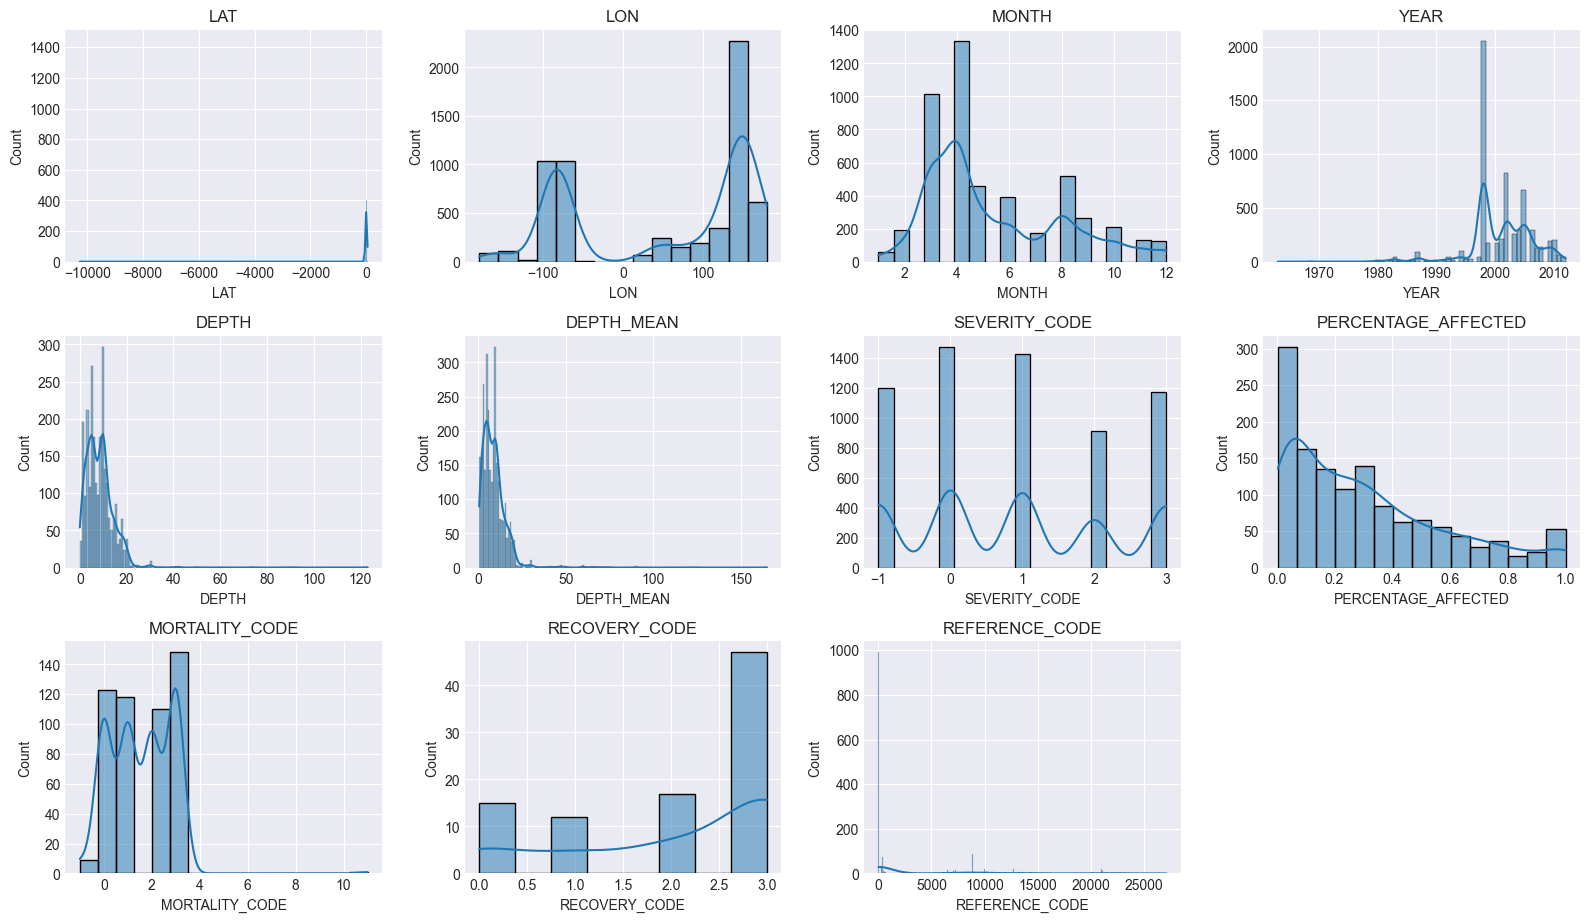

In [8]:
# Configuração dos gráficos
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(16, 12))

# Lista de variáveis numéricas
numeric_columns = [
    'LAT', 'LON', 'MONTH', 'YEAR', 'DEPTH','DEPTH_MEAN', 'SEVERITY_CODE',
    'PERCENTAGE_AFFECTED', 'MORTALITY_CODE', 'RECOVERY_CODE', 'REFERENCE_CODE'
]

# Plota histogramas
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

#### Análise das variáveis categóricas

In [9]:
# Lista de espécies para criar variáveis binárias
especies = [
    'Montastraea annularis',
    'Acropora',
    'Acropora palmata',
    'Montastraea sp. (= annularis complex)',
    'Porites',
    'Pocillopora',
    'Montastraea faveolata'
]

# Cria variáveis binárias para cada espécie
for especie in especies:
    if especie in ['Montastraea annularis', 'Montastraea sp. (= annularis complex)']:
        data['Montastraea_annularis_complex'] = data['CORAL_SPECIES'].str.contains('Montastraea annularis|Montastraea sp. (= annularis complex)', case=False, na=False).astype(int)
    else:
        data[especie] = data['CORAL_SPECIES'].str.contains(especie, case=False, na=False).astype(int)

# Cria variável binária para outras espécies
data['Other_species'] = (~data['CORAL_SPECIES'].str.contains('|'.join(especies), case=False, na=False)).astype(int)

C:\Users\muril\AppData\Local\Temp\ipykernel_8484\1448928360.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['Montastraea_annularis_complex'] = data['CORAL_SPECIES'].str.contains('Montastraea annularis|Montastraea sp. (= annularis complex)', case=False, na=False).astype(int)
C:\Users\muril\AppData\Local\Temp\ipykernel_8484\1448928360.py:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['Montastraea_annularis_complex'] = data['CORAL_SPECIES'].str.contains('Montastraea annularis|Montastraea sp. (= annularis complex)', case=False, na=False).astype(int)
C:\Users\muril\AppData\Local\Temp\ipykernel_8484\1448928360.py:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['Other_species'] = (~data['CORAL_SPECIES'].st

In [10]:
# Lista de famílias de corais para criar variáveis binárias
familias = [
    'Acroporidae',
    'Poritidae',
    'Faviidae',
    'Pocilloporidae',
    'Siderastreidae',
    'Agariciidae'
]

# Cria variáveis binárias para cada família
for familia in familias:
    data[familia] = data['CORAL_FAMILY'].str.contains(familia, case=False, na=False).astype(int)

# Cria variável binária para outras famílias
data['Other_families'] = (~data['CORAL_FAMILY'].str.contains('|'.join(familias), case=False, na=False)).astype(int)


#### Análise da variável resposta

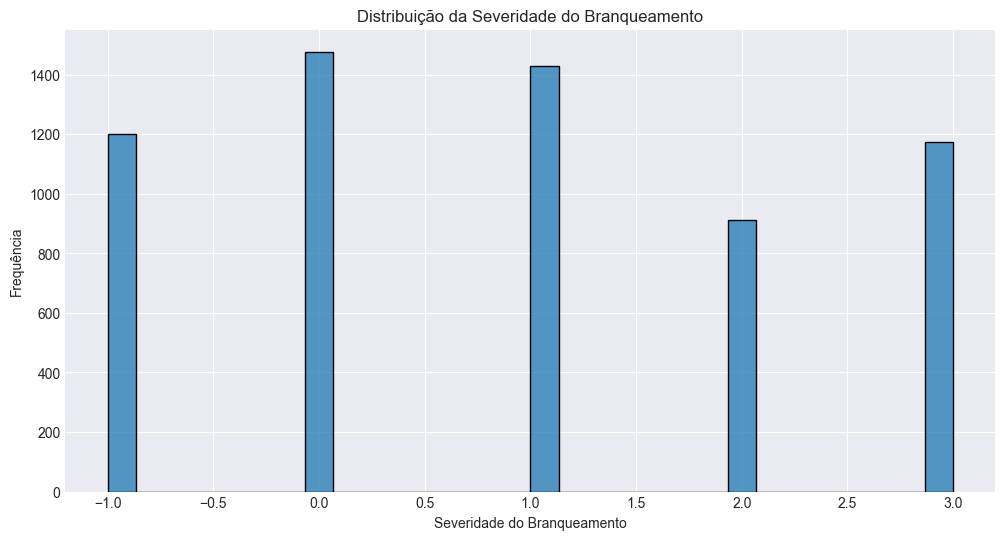

In [11]:
# Plota a distribuição de BLEACHING_SEVERITY
plt.figure(figsize=(12, 6))
sns.histplot(data['SEVERITY_CODE'], kde=False, bins=30)
plt.title('Distribuição da Severidade do Branqueamento')
plt.xlabel('Severidade do Branqueamento')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [12]:
# Filtra a variável resposta para valores diferentes de 0 e -1
data = data[(data['SEVERITY_CODE'] != 0) & (data['SEVERITY_CODE'] != -1)]

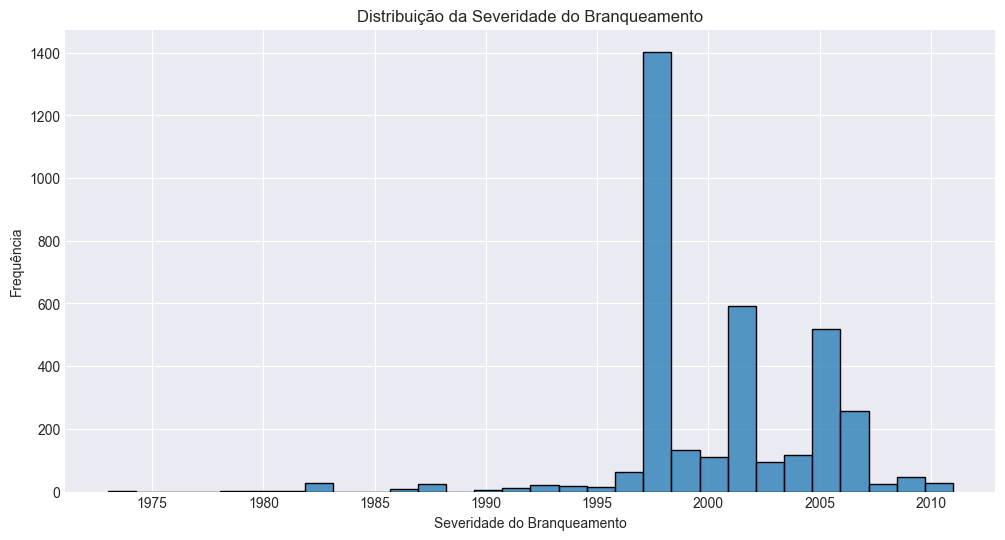

In [13]:
# Plota a distribuição de YEAR
plt.figure(figsize=(12, 6))
sns.histplot(data['YEAR'], kde=False, bins=30)
plt.title('Distribuição da Severidade do Branqueamento')
plt.xlabel('Severidade do Branqueamento')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [14]:
# Filtra a data acima de 2000
data = data[(data['YEAR'] >= 2000)]

### 4. Tratamento dos dados

#### Remove variáveis desnecessárias ou com algum problema

In [15]:
# Calcular a porcentagem de valores nulos em cada coluna
percentual_nulos = (data.isnull().sum() / len(data)) * 100
print(percentual_nulos)

ID                                0.000000
REGION                            0.336323
SUBREGION                         0.336323
COUNTRY                           0.000000
LOCATION                          0.112108
LAT                               0.000000
LON                               0.000000
MONTH                             2.073991
YEAR                              0.000000
DEPTH                            41.031390
DEPTH_MEAN                       30.885650
SEVERITY_CODE                     0.000000
BLEACHING_SEVERITY                0.000000
CORAL_FAMILY                     94.338565
CORAL_SPECIES                    81.109865
PERCENTAGE_AFFECTED              38.284753
BLEACHING_DURATION               94.618834
MORTALITY_CODE                   90.919283
MORTALITY                        93.497758
RECOVERY_CODE                    99.607623
RECOVERY                         99.215247
SURVEY_TYPE                      33.520179
SURVEY_AREA                      54.764574
WATER_TEMPE

In [16]:
# Remove colunas
columns_to_drop = ['ID', 'REGION', 'SUBREGION', 'LOCATION', 'MONTH', 'COUNTRY_CODE', 'WATER_TEMPERATURE', 'CORAL_SPECIES', 'CORAL_FAMILY', 'YEAR', 'DEPTH', 'BLEACHING_SEVERITY', 'PERCENTAGE_AFFECTED', 'BLEACHING_DURATION', 'MORTALITY', 'MORTALITY_CODE', 'RECOVERY_CODE', 'RECOVERY', 'SURVEY_TYPE', 'SURVEY_AREA', 'OTHER_FACTORS', 'REFERENCE_CODE', 'SOURCE', 'REMARKS']
data.drop(columns=columns_to_drop, inplace=True)

In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1784 entries, 7 to 6189
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   COUNTRY                        1784 non-null   object 
 1   LAT                            1784 non-null   float64
 2   LON                            1784 non-null   float64
 3   DEPTH_MEAN                     1233 non-null   float64
 4   SEVERITY_CODE                  1784 non-null   int64  
 5   Montastraea_annularis_complex  1784 non-null   int32  
 6   Acropora                       1784 non-null   int32  
 7   Acropora palmata               1784 non-null   int32  
 8   Porites                        1784 non-null   int32  
 9   Pocillopora                    1784 non-null   int32  
 10  Montastraea faveolata          1784 non-null   int32  
 11  Other_species                  1784 non-null   int32  
 12  Acroporidae                    1784 non-null   int32 

#### Remove outliers

In [18]:
# Verificar e remover outliers
for column in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))
    data = data[~outliers]

In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1515 entries, 10 to 6168
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   COUNTRY                        1515 non-null   object 
 1   LAT                            1515 non-null   float64
 2   LON                            1515 non-null   float64
 3   DEPTH_MEAN                     1051 non-null   float64
 4   SEVERITY_CODE                  1515 non-null   int64  
 5   Montastraea_annularis_complex  1515 non-null   int32  
 6   Acropora                       1515 non-null   int32  
 7   Acropora palmata               1515 non-null   int32  
 8   Porites                        1515 non-null   int32  
 9   Pocillopora                    1515 non-null   int32  
 10  Montastraea faveolata          1515 non-null   int32  
 11  Other_species                  1515 non-null   int32  
 12  Acroporidae                    1515 non-null   int32

Relação entre latitude e longitude

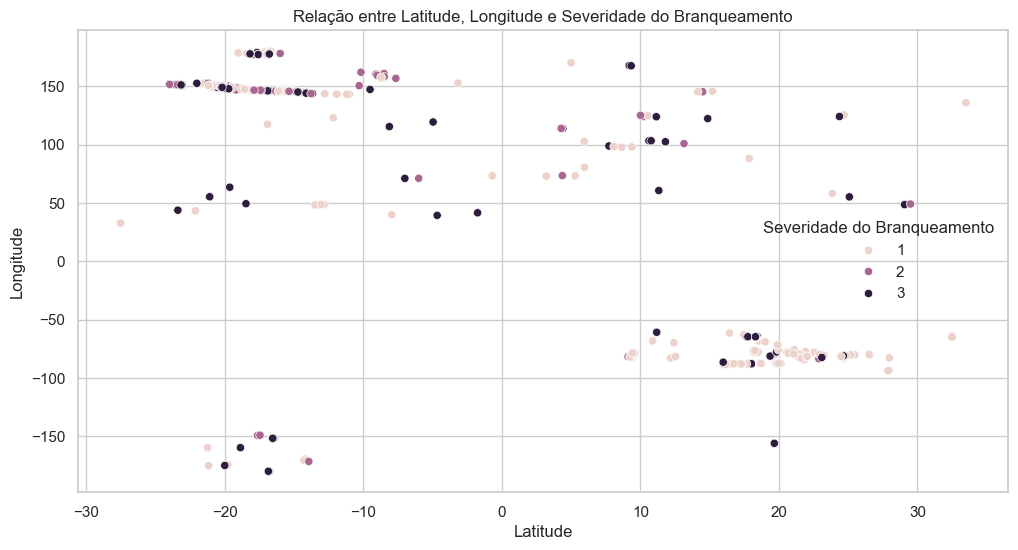

In [20]:
# Configura estilo das visualizações
sns.set(style="whitegrid")

# Análise Bivariada
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LAT', y='LON', hue='SEVERITY_CODE', data=data)
plt.title('Relação entre Latitude, Longitude e Severidade do Branqueamento')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Severidade do Branqueamento')
plt.show()


Acurácia:  0.6105610561056105
              precision    recall  f1-score   support

           1       0.71      0.75      0.73       154
           2       0.38      0.37      0.38        73
           3       0.61      0.55      0.58        76

    accuracy                           0.61       303
   macro avg       0.57      0.56      0.56       303
weighted avg       0.61      0.61      0.61       303



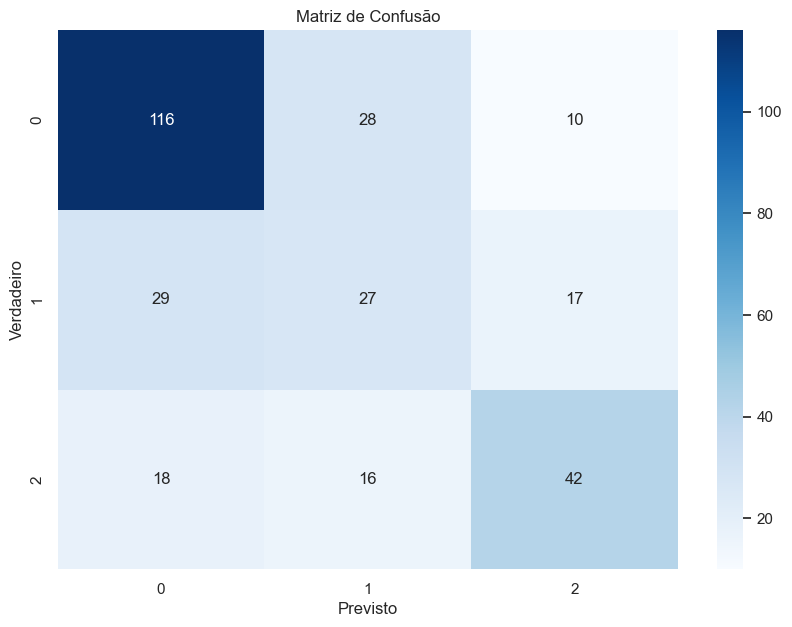

In [21]:
# Prepara os dados para a modelagem
data = pd.get_dummies(data, drop_first=True)
X = data.drop(columns=['SEVERITY_CODE'])
y = data['SEVERITY_CODE']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Previsões e avaliação
y_pred = modelo.predict(X_test)
print("Acurácia: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [22]:
# Salva o modelo treinado
joblib.dump(modelo, 'best_model.pkl')

['best_model.pkl']

In [23]:
# Supondo que você tenha um DataFrame `X_train` usado para treinar o modelo
trained_columns = X_train.columns.tolist()
joblib.dump(trained_columns, 'trained_columns.pkl')

['trained_columns.pkl']

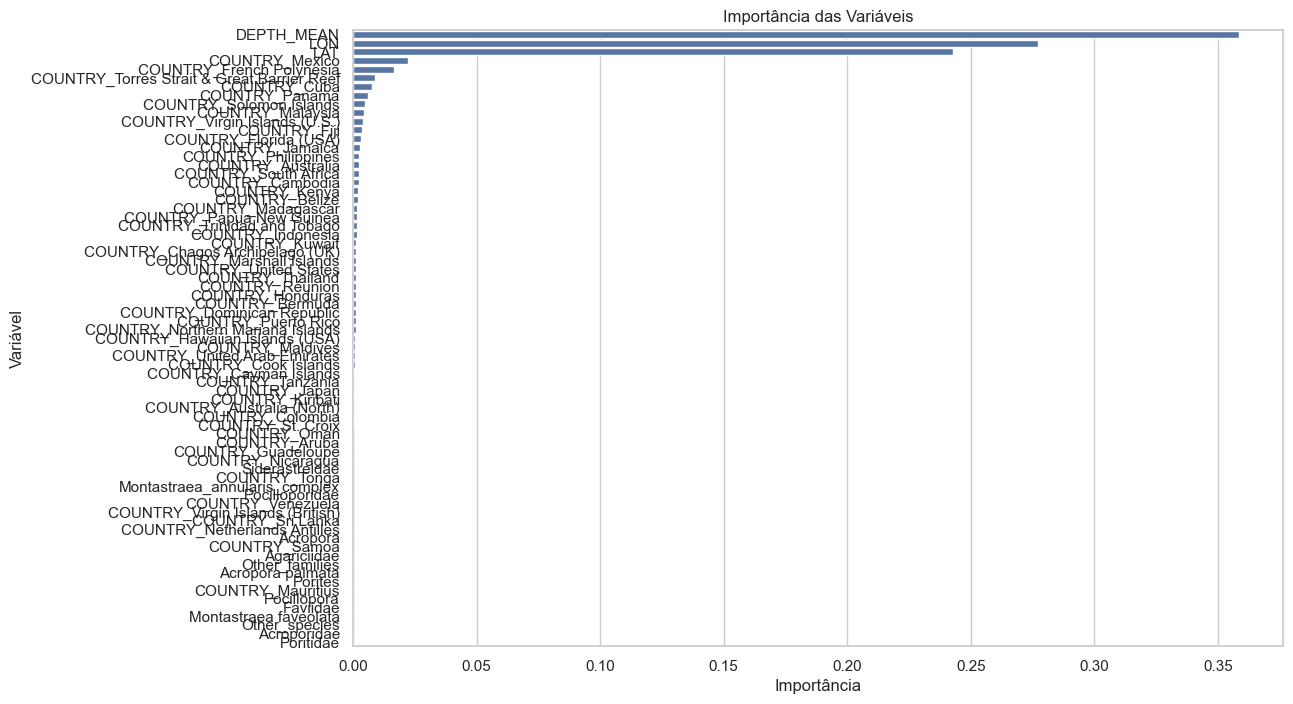

In [23]:
# Obter a importância das variáveis
importances = modelo.feature_importances_
features = X.columns

# Criar um DataFrame para facilitar a visualização
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Ordenar por importância
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotar a importância das variáveis
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importância das Variáveis')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()
